## PCA, SVD example

In [1]:
import numpy as np

In [2]:
a = np.array([[4,4.2,3.9,4.3,4.1],[2,2.1,2,2.1,2.2],[.6,.59,.58,.62,.63]])
a = a.T
a

array([[ 4.  ,  2.  ,  0.6 ],
       [ 4.2 ,  2.1 ,  0.59],
       [ 3.9 ,  2.  ,  0.58],
       [ 4.3 ,  2.1 ,  0.62],
       [ 4.1 ,  2.2 ,  0.63]])

In [3]:
avg = np.average(a,axis = 0)
avg

array([ 4.1  ,  2.08 ,  0.604])

In [4]:
a - avg

array([[-0.1  , -0.08 , -0.004],
       [ 0.1  ,  0.02 , -0.014],
       [-0.2  , -0.08 , -0.024],
       [ 0.2  ,  0.02 ,  0.016],
       [ 0.   ,  0.12 ,  0.026]])

In [5]:
#after normalization
b=a-avg
b

array([[-0.1  , -0.08 , -0.004],
       [ 0.1  ,  0.02 , -0.014],
       [-0.2  , -0.08 , -0.024],
       [ 0.2  ,  0.02 ,  0.016],
       [ 0.   ,  0.12 ,  0.026]])

In [6]:
#get covariance matrix
cov = np.dot(b.T,b)/4
cov

array([[ 0.025  ,  0.0075 ,  0.00175],
       [ 0.0075 ,  0.007  ,  0.00135],
       [ 0.00175,  0.00135,  0.00043]])

In [7]:
#you can get covariance matrix directly using numpy
cov2 = np.cov(a.transpose())
cov2

array([[ 0.025  ,  0.0075 ,  0.00175],
       [ 0.0075 ,  0.007  ,  0.00135],
       [ 0.00175,  0.00135,  0.00043]])

## Compute corelation matrix

In [8]:
np.corrcoef(a.transpose())

array([[ 1.        ,  0.56694671,  0.533745  ],
       [ 0.56694671,  1.        ,  0.77812706],
       [ 0.533745  ,  0.77812706,  1.        ]])

In [9]:
np.var(a, axis = 0)

array([ 0.02    ,  0.0056  ,  0.000344])

In [10]:
c = np.sqrt(np.diagonal(cov2))
c

array([ 0.15811388,  0.083666  ,  0.02073644])

In [15]:
print (np.std(a, axis = 0))
print 
cc = b/np.std(a, axis = 0)
print (cc)
print
print (np.cov(cc.transpose())*.8)
print 
print (np.dot(cc.T,cc)/5)

[ 0.14142136  0.07483315  0.01854724]
[[-0.70710678 -1.06904497 -0.21566555]
 [ 0.70710678  0.26726124 -0.75482941]
 [-1.41421356 -1.06904497 -1.29399328]
 [ 1.41421356  0.26726124  0.86266219]
 [ 0.          1.60356745  1.40182605]]
[[ 1.          0.56694671  0.533745  ]
 [ 0.56694671  1.          0.77812706]
 [ 0.533745    0.77812706  1.        ]]
[[ 1.          0.56694671  0.533745  ]
 [ 0.56694671  1.          0.77812706]
 [ 0.533745    0.77812706  1.        ]]


In [29]:
#np.linalg.inv(c)

In [17]:
c.T * cov2 * c

array([[  6.25000000e-04,   5.25000000e-05,   7.52500000e-07],
       [  1.87500000e-04,   4.90000000e-05,   5.80500000e-07],
       [  4.37500000e-05,   9.45000000e-06,   1.84900000e-07]])

In [18]:
np.cov(c.transpose())

array(0.004729196341745432)

In [19]:
#get eigen-value and eigenvectors using np
np.linalg.eig(cov2)

(array([ 0.02787694,  0.00439387,  0.0001592 ]),
 array([[ 0.93676841,  0.34958469, -0.0159843 ],
        [ 0.34148069, -0.92313136, -0.1766902 ],
        [ 0.0765238 , -0.16005947,  0.98413672]]))

In [20]:
#or get usv by svd method, U == eigenvalues (in order)
U, s, V = np.linalg.svd(cov2, full_matrices=False)

In [21]:
U #正交阵（Orthogonal matrix） np.dot(U, U.T) = I

array([[-0.93676841,  0.34958469, -0.0159843 ],
       [-0.34148069, -0.92313136, -0.1766902 ],
       [-0.0765238 , -0.16005947,  0.98413672]])

In [22]:
#s == eigenvalues
s

array([ 0.02787694,  0.00439387,  0.0001592 ])

In [23]:
V

array([[-0.93676841, -0.34148069, -0.0765238 ],
       [ 0.34958469, -0.92313136, -0.16005947],
       [-0.0159843 , -0.1766902 ,  0.98413672]])

In [24]:
U_ = U[:, :2]
U_

array([[-0.93676841,  0.34958469],
       [-0.34148069, -0.92313136],
       [-0.0765238 , -0.16005947]])

### now we find we get the same matrix

In [30]:
#after normalization of b
np.dot(b, U_)

array([[ 0.12130139,  0.03953228],
       [-0.09943512,  0.01873667],
       [ 0.21650871,  0.007775  ],
       [-0.19540768,  0.04889336],
       [-0.0429673 , -0.11493731]])

In [33]:
#use sklearn for pca
from sklearn.decomposition import PCA
X = a
pca = PCA(n_components=2) #reduce a to 2 dims
pca.fit_transform(X)

array([[ 0.12130139, -0.03953228],
       [-0.09943512, -0.01873667],
       [ 0.21650871, -0.007775  ],
       [-0.19540768, -0.04889336],
       [-0.0429673 ,  0.11493731]])

In [35]:
pca.get_precision()

array([[   60.8974359 ,   -44.23076923,  -108.97435897],
       [  -44.23076923,   394.23076923, -1057.69230769],
       [ -108.97435897, -1057.69230769,  6089.74358974]])

In [38]:
pca.get_covariance()

array([[ 0.025  ,  0.0075 ,  0.00175],
       [ 0.0075 ,  0.007  ,  0.00135],
       [ 0.00175,  0.00135,  0.00043]])

In [40]:
print(pca.explained_variance_ratio_.cumsum())

[ 0.8596033   0.99509097]


In [32]:
np.dot(np.dot(U, s), V)

array([ 0.01831367,  0.02142534,  0.00142107])

In [28]:
np.dot(U, U.T)

array([[  1.00000000e+00,  -1.91253263e-16,  -4.85722573e-17],
       [ -1.91253263e-16,   1.00000000e+00,   2.22044605e-16],
       [ -4.85722573e-17,   2.22044605e-16,   1.00000000e+00]])

In [65]:
s

array([ 0.02787694,  0.00439387,  0.0001592 ])

In [72]:
M = np.array([[1,0,0,0,2],[0,0,3,0,0],[0,0,0,0,0],[0,2,0,0,0]])
#https://en.wikipedia.org/wiki/Singular-value_decomposition

In [70]:
UU, sig, VV = np.linalg.svd(M, full_matrices=False)

In [71]:
print(UU)
print(sig)
print(VV)

[[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]
[ 3.          2.23606798  2.          0.        ]
[[-0.          0.          1.         -0.          0.        ]
 [ 0.4472136  -0.         -0.         -0.          0.89442719]
 [-0.          1.          0.         -0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]]


## Use SVD for denoising

In [149]:
import matplotlib.pyplot as plt

In [150]:
import cv2

In [151]:
im = cv2.imread("nyc.jpg")
print(type(im))
print(im.shape)

<class 'numpy.ndarray'>
(600, 800, 3)


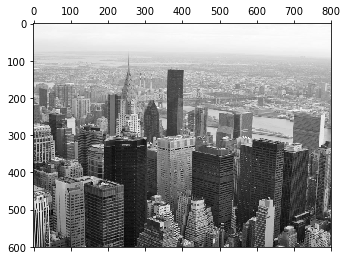

In [152]:
im_1 = im[:,:,1]
plt.matshow(im_1)
plt.show()

In [153]:
im_1.shape

(600, 800)

In [154]:
UU, sig, VV = np.linalg.svd(im_1, full_matrices=False)

In [155]:
sig.shape

(600,)

In [156]:
sig[:10]

array([ 101755.83412867,   12624.4172067 ,    9588.09928731,
          8094.60391382,    6621.09780268,    5598.27206759,
          5218.78061012,    4735.26835504,    4049.6316821 ,
          3530.33452682])

In [157]:
print(UU.shape)
print(VV.shape)

(600, 600)
(600, 800)


In [158]:
def get_shrink_sig(n):##return a new s only with the first n elements (取得s的前n个奇异值）
    sig_shrink = np.zeros([600,600])
    for i in range(n):
        sig_shrink[i][i] = sig[i]
    return sig_shrink

In [159]:
def plot_new_image(n): #使用s的前n个奇异值重新画图
    img_2 = np.dot(np.dot(UU, get_shrink_sig(n)), VV)
    img_2.shape
    plt.matshow(img_2)
    plt.show()


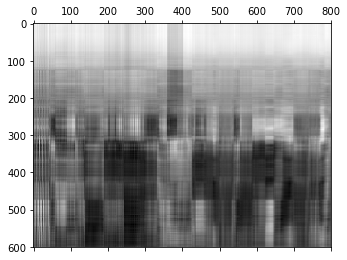

In [160]:
plot_new_image(5)

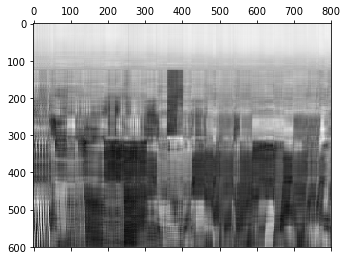

In [161]:
plot_new_image(10)

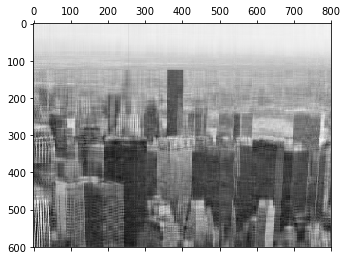

In [162]:
plot_new_image(20)

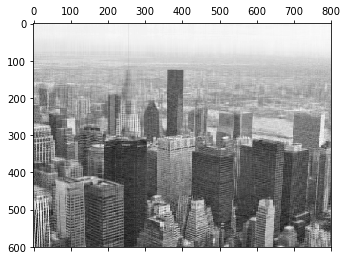

In [163]:
plot_new_image(50)

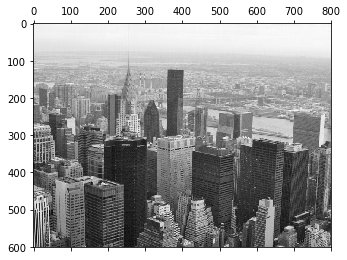

In [164]:
plot_new_image(200)